# SC1015 Group 7 Mini-Project


In [1]:
##!pip install -U textblob
##!python -m textblob.download_corpora
# to install required stuffs

## Importing of Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

from textblob import TextBlob

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats

from collections import Counter
air_data = pd.read_csv("listings_june.csv")
air_data.shape


(4238, 74)

##### Checking top few datas


In [3]:
air_data.head(n=20)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34
5,71903,https://www.airbnb.com/rooms/71903,20210629180711,2021-06-30,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,https://www.airbnb.com/users/show/367042,...,4.64,4.51,4.38,NaN,f,4,0,4,0,0.67
6,275343,https://www.airbnb.com/rooms/275343,20210629180711,2021-06-30,"Conveniently located City Room!(1,2,3,4,5,6,7,8)",Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/11979330/9bbd...,1439258,https://www.airbnb.com/users/show/1439258,...,4.47,4.53,4.59,NaN,f,50,1,49,0,0.20
7,275344,https://www.airbnb.com/rooms/275344,20210629180711,2021-06-30,15 mins to Outram MRT Single Room (B),Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/4669645/563ab...,1439258,https://www.airbnb.com/users/show/1439258,...,4.58,4.58,4.50,NaN,f,50,1,49,0,0.16
8,294281,https://www.airbnb.com/rooms/294281,20210629180711,2021-06-30,5 mins walk from Newton subway,I have 3 bedrooms in a charming British style...,NaN,https://a0.muscache.com/pictures/4607862/87f42...,1521514,https://www.airbnb.com/users/show/1521514,...,4.66,4.52,4.39,NaN,f,7,1,6,0,1.30
9,301247,https://www.airbnb.com/rooms/301247,20210629180711,2021-06-30,Nice room with private bath beside train station,Located just beside the PayaLebar train statio...,NaN,https://a0.muscache.com/pictures/107631887/bc6...,1552002,https://www.airbnb.com/users/show/1552002,...,4.70,4.77,4.63,NaN,f,1,0,1,0,1.78


## Extracting the response

In [4]:
ratings = pd.DataFrame(air_data["review_scores_rating"])

In [5]:
ratings.isna().sum()

review_scores_rating    1759
dtype: int64

### Convert description data to string

In [6]:
air_data["description"] = air_data["description"].map(str)

## Cleaning data, remove HTML Tags, Characters and Numbers into a new df 

In [7]:
air_data["description"] = air_data["description"].str.replace(r'<[^<>]*>', ' ', regex=True)
#air_data["description"] = air_data["description"].str.replace(('\?|\|&|•|+|-|'), '',regex=True)
air_data["description"] = air_data["description"].str.replace('\W', ' ', regex=True)
des = pd.DataFrame(air_data["description"])
des["description"] = des["description"].str.replace('\d+', ' ', regex=True)
des.head()
top_words =  pd.DataFrame(' '.join(des["description"]).lower().split()).value_counts()[8:105]



In [8]:
top_words.head()

for          5902
room         4711
space        4098
apartment    4062
access       3770
dtype: int64

In [9]:
air_data["description"].head()

0     The space  This is Room No  2  available afte...
1    Fully furnished bedroom with a nice view on th...
2     The space  This is Room no  1  USD700 per mon...
3    For 3 rooms Book room 1 2 and room 4   The spa...
4     The space  Vocational Stay Deluxe Bedroom in ...
Name: description, dtype: object

# Function to print the top 100 used words|

In [10]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    

In [11]:
print_full(top_words )

for           5902
room          4711
space         4098
apartment     4062
access        3770
you           3417
are           3122
bed           2529
guest         2526
mrt           2492
this          2485
from          2378
at            2354
fully         2341
your          2330
private       2320
singapore     2231
free          2079
shared        2052
kitchen       2001
our           1964
no            1947
walk          1915
area          1902
located       1889
bedroom       1884
s             1852
as            1841
it            1746
other         1710
wifi          1709
we            1581
note          1498
bathroom      1483
living        1483
stay          1464
furnished     1375
can           1368
city          1362
queen         1348
or            1335
will          1334
be            1326
tv            1308
mins          1301
guests        1270
dining        1259
place         1240
dryer         1232
all           1231
equipped      1215
size          1197
an          

In [12]:
top_words.dtypes

dtype('int64')

# Cleaning Description of HTML Tags 

In [13]:
air_data["description"].head()

0     The space  This is Room No  2  available afte...
1    Fully furnished bedroom with a nice view on th...
2     The space  This is Room no  1  USD700 per mon...
3    For 3 rooms Book room 1 2 and room 4   The spa...
4     The space  Vocational Stay Deluxe Bedroom in ...
Name: description, dtype: object

## Applying Sentiments to name

In [14]:
air_data["name_polarity"] = air_data['name'].apply(lambda x: TextBlob(x).sentiment.polarity)

## Applying Sentiments to Neighbourhood overview and description
## sentiment_calc try catch function

In [15]:

def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
    
air_data["neigh_polarity"] = air_data['neighborhood_overview'].apply(sentiment_calc)
air_data["des_polarity"] = air_data['description'].apply(sentiment_calc)


In [16]:
air_data["neigh_polarity"]= air_data["neigh_polarity"].replace(np.nan, 0)

### Check the new columns

In [17]:
air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,name_polarity,neigh_polarity,des_polarity
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,The space This is Room No 2 available afte...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,NaN,f,2,0,2,0,0.01,-0.050000,0.000000,0.153081
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,NaN,f,1,0,1,0,0.22,0.733333,0.406667,0.286661
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,The space This is Room no 1 USD700 per mon...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,NaN,f,2,0,2,0,0.16,0.000000,0.000000,0.194603
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms Book room 1 2 and room 4 The spa...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,NaN,t,4,0,4,0,0.29,0.100000,0.000000,0.090278
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,NaN,t,4,0,4,0,0.34,0.100000,0.000000,0.187500


In [18]:
neighbour_polarity = air_data["neigh_polarity"]
neighbour_polarity.head()

0    0.000000
1    0.406667
2    0.000000
3    0.000000
4    0.000000
Name: neigh_polarity, dtype: float64

In [19]:
name_polarity =  air_data["name_polarity"]
name_polarity.head()

0   -0.050000
1    0.733333
2    0.000000
3    0.100000
4    0.100000
Name: name_polarity, dtype: float64

In [20]:
description_polarity = air_data["des_polarity"]
description_polarity.head()

0    0.153081
1    0.286661
2    0.194603
3    0.090278
4    0.187500
Name: des_polarity, dtype: float64

In [21]:
neighbourhood = air_data["neighbourhood_cleansed"]
neighbourhood.head(n=20)


0        Woodlands
1      Bukit Timah
2        Woodlands
3         Tampines
4         Tampines
5         Tampines
6      Bukit Merah
7      Bukit Merah
8           Newton
9          Geylang
10     Bukit Merah
11     Bukit Merah
12     Bukit Merah
13        Tampines
14         Geylang
15          Newton
16          Newton
17    River Valley
18       Serangoon
19        Tampines
Name: neighbourhood_cleansed, dtype: object

In [22]:
tt = pd.DataFrame(air_data["amenities"])

In [23]:
tt.head


<bound method NDFrame.head of                                               amenities
0     ["Air conditioning", "Elevator", "Wifi", "Long...
1     ["Air conditioning", "Kitchen", "Elevator", "W...
2     ["Air conditioning", "Kitchen", "Elevator", "W...
3     ["Wifi", "Washer", "Kitchen", "Long term stays...
4     ["Wifi", "Washer", "Kitchen", "Long term stays...
...                                                 ...
4233  ["TV", "Air conditioning", "Kitchen", "Hangers...
4234  ["Elevator", "Wifi", "Pool", "Washer", "Kitche...
4235  ["Elevator", "Wifi", "Pool", "Washer", "Dishes...
4236  ["Air conditioning", "Kitchen", "Wifi", "Long ...
4237  ["Laundromat nearby", "Hot water kettle", "Ele...

[4238 rows x 1 columns]>

In [24]:
#air_data["amenities"]=air_data["amenities"].str.replace('"', '')
#air_data["amenities"]=air_data["amenities"].str.replace(']', '')
#air_data["amenities"]=air_data["amenities"].str.replace('[', '')

air_data["amenities"]=air_data['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
air_data["amenities"] =air_data["amenities"].to_frame()
air_data["amenities"].head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_14224/482382073.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air_data["amenities"]=air_data['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')


0    Air conditioning, Elevator, Wifi, Long term st...
1    Air conditioning, Kitchen, Elevator, Wifi, Gym...
2    Air conditioning, Kitchen, Elevator, Wifi, Cab...
3    Wifi, Washer, Kitchen, Long term stays allowed...
4    Wifi, Washer, Kitchen, Long term stays allowed...
Name: amenities, dtype: object

In [25]:
#top_amenities =  pd.DataFrame(''.join(air_data["amenities"]).lower().split(',')).value_counts()[0:250]
top_amenities = air_data['amenities'].str.split(', ', expand=True).stack().value_counts()
top_amenities = top_amenities.rename_axis('amenities').reset_index(name='count')

# New row showing number of amenities

In [26]:
air_data["num_of_amenities"]= air_data["amenities"].apply(lambda n: len(n.split(",")))
air_data["num_of_amenities"].head()

0     7
1    12
2     8
3    25
4    21
Name: num_of_amenities, dtype: int64

# All unique amenities


In [27]:
print_full(top_amenities)

                                             amenities  count
0                              Long term stays allowed   4157
1                                     Air conditioning   4107
2                                                 Wifi   4086
3                                           Essentials   3641
4                                               Washer   3603
5                                              Hangers   3432
6                                              Kitchen   3335
7                                                 Iron   3247
8                                  Dedicated workspace   3186
9                                           Hair dryer   3004
10                                               Dryer   2794
11                                           Hot water   2697
12                                             Shampoo   2670
13                                        Refrigerator   2217
14                                            Elevator   2147
15      

# Generating true false for each amenities

In [28]:
#air_data["long_term_stay"] = air_data["amenities"].str.contains("Kitchen",regex=False).any()
test = pd.DataFrame(air_data[air_data["amenities"].str.contains("Fire Pit",case=False,regex=False)==True]) #only new df not column
air_data["long_term_stay"] = np.where(air_data["amenities"].str.contains("long term stays allowed",case=False,regex=False)==True, True, False)
air_data["has_wifi"] = np.where(air_data["amenities"].str.contains("wifi",case=False,regex=False)==True, True, False)
air_data["has_free_parking"] = np.where(air_data["amenities"].str.contains("Free Parking On Premises",case=False,regex=False)==True, True, False)
air_data.head()


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,name_polarity,neigh_polarity,des_polarity,num_of_amenities,long_term_stay,has_wifi,has_free_parking
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,The space This is Room No 2 available afte...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,2,0,0.01,-0.050000,0.000000,0.153081,7,True,True,False
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,1,0,0.22,0.733333,0.406667,0.286661,12,True,True,False
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,The space This is Room no 1 USD700 per mon...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,2,0,0.16,0.000000,0.000000,0.194603,8,False,True,False
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms Book room 1 2 and room 4 The spa...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4,0,0.29,0.100000,0.000000,0.090278,25,True,True,False
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4,0,0.34,0.100000,0.000000,0.187500,21,True,True,False


In [29]:
air_data["has_free_parking"].head()

0    False
1    False
2    False
3    False
4    False
Name: has_free_parking, dtype: bool

In [30]:
test.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,name_polarity,neigh_polarity,des_polarity,num_of_amenities
498,10214097,https://www.airbnb.com/rooms/10214097,20210629180711,2021-06-30,Deluxe Sea-Facing Condo ~ Luxury Beach Amenities,1647 sq ft huge space Wake up to the Ocea...,I ask you to pls say that you are family or fr...,https://a0.muscache.com/pictures/d6605761-68e2...,52485030,https://www.airbnb.com/users/show/52485030,...,f,1,1,0,0,1.28,0.6,0.288889,0.058716,38
1889,29836188,https://www.airbnb.com/rooms/29836188,20210629180711,2021-06-30,❤180º Marina Bay View 2B2B (incl driver) 金莎景包接...,Includes a transfer from anywhere in SG Ne...,You have Marina Bay at your doorstep and from ...,https://a0.muscache.com/pictures/miso/Hosting-...,224422788,https://www.airbnb.com/users/show/224422788,...,f,1,1,0,0,1.30,0.0,0.034167,0.225833,49
4159,49922883,https://www.airbnb.com/rooms/49922883,20210629180711,2021-06-30,4 bedroom serviced apartment on Singapore River,1 950 sqft overlooking Singapore River betwee...,NaN,https://a0.muscache.com/pictures/23492648-d005...,189476945,https://www.airbnb.com/users/show/189476945,...,t,1,1,0,0,NaN,0.0,0.000000,0.402273,66


In [31]:
ratings.head()

,review_scores_rating
0,5.00
1,4.56
2,4.88
3,4.44
4,4.16


In [32]:
has_lts = pd.DataFrame(air_data["long_term_stay"])

In [33]:
has_lts.head()

,long_term_stay
0,True
1,True
2,False
3,True
4,True


# Generate Violin Plot of Rating and Correlation 

<AxesSubplot:>

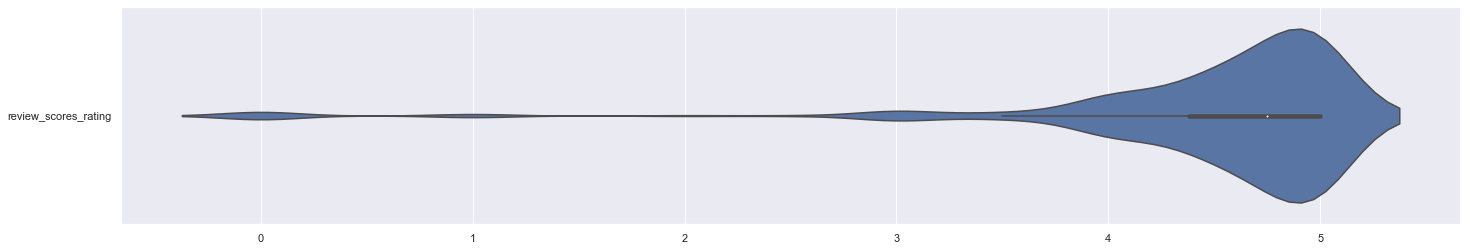

In [34]:
f = plt.figure(figsize=(24, 4))
sb.violinplot(data = ratings, orient = "h")

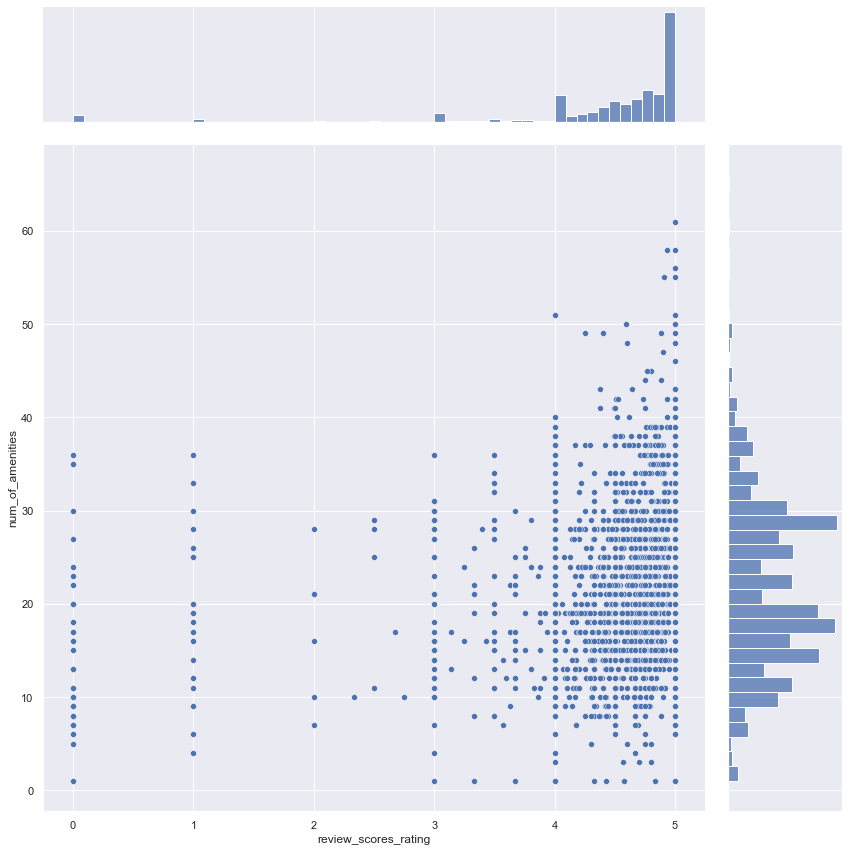

In [35]:
sb.jointplot(data = air_data, x = "review_scores_rating", y = "num_of_amenities", height = 12)

<AxesSubplot:>

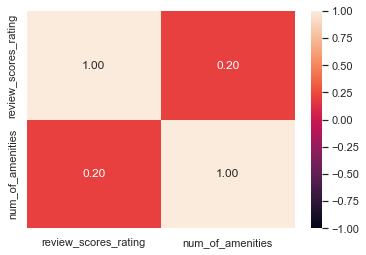

In [36]:
num_amen = pd.DataFrame(air_data["num_of_amenities"])
jointDF = pd.concat([ratings, num_amen], axis = 1).reindex(ratings.index)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

## Long Term Stay vs Ratings

<Figure size 1728x720 with 0 Axes>

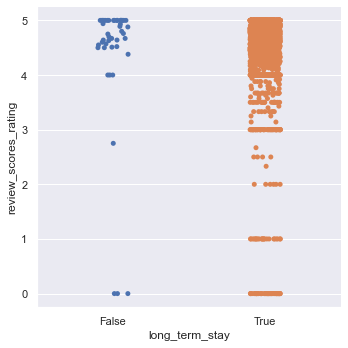

In [37]:
f = plt.figure(figsize=(24, 10))
sb.catplot(y = "review_scores_rating", x = "long_term_stay",data=air_data)

## Has Wifi vs Ratings

<Figure size 1728x720 with 0 Axes>

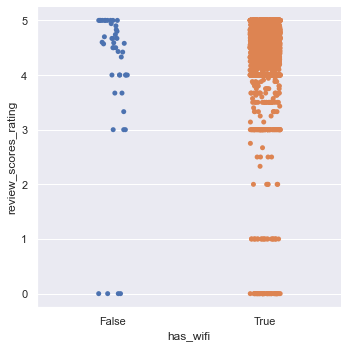

In [38]:
f = plt.figure(figsize=(24, 10))
sb.catplot(y = "review_scores_rating", x = "has_wifi",data=air_data)

In [39]:
#air_data["has_free_parking"] = np.where(air_data["amenities"].str.contains("Free|Parking|On|Premises",case=False)==True, True, False)
air_data["has_free_parking"].head()

0    False
1    False
2    False
3    False
4    False
Name: has_free_parking, dtype: bool

## Has Free Parking vs Ratings

<Figure size 1728x720 with 0 Axes>

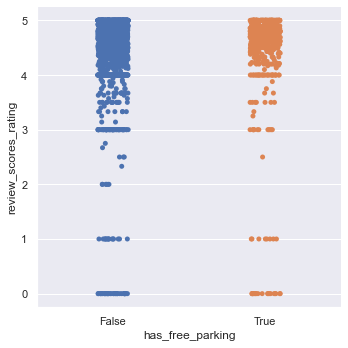

In [40]:
f = plt.figure(figsize=(24, 10))
sb.catplot(y = "review_scores_rating", x = "has_free_parking",data=air_data)

In [41]:
air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,name_polarity,neigh_polarity,des_polarity,num_of_amenities,long_term_stay,has_wifi,has_free_parking
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,The space This is Room No 2 available afte...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,2,0,0.01,-0.050000,0.000000,0.153081,7,True,True,False
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,1,0,0.22,0.733333,0.406667,0.286661,12,True,True,False
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,The space This is Room no 1 USD700 per mon...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,2,0,0.16,0.000000,0.000000,0.194603,8,False,True,False
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms Book room 1 2 and room 4 The spa...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4,0,0.29,0.100000,0.000000,0.090278,25,True,True,False
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4,0,0.34,0.100000,0.000000,0.187500,21,True,True,False


# Number of Verifications

In [42]:
veri = pd.DataFrame(air_data["host_verifications"])

In [43]:
veri.head()

,host_verifications
0,"['email', 'phone', 'facebook', 'reviews', 'jum..."
1,"['email', 'phone', 'facebook', 'reviews', 'off..."
2,"['email', 'phone', 'facebook', 'reviews', 'jum..."
3,"['email', 'phone', 'reviews', 'manual_offline'..."
4,"['email', 'phone', 'reviews', 'manual_offline'..."


In [44]:
veri["host_verifications"]=veri['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','')
veri["host_verifications"] =veri["host_verifications"].to_frame()
veri["host_verifications"].head()

C:\Users\junwe\AppData\Local\Temp/ipykernel_14224/2175466419.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  veri["host_verifications"]=veri['host_verifications'].str.replace('[', '').str.replace(']','').str.replace('"','')


0    'email', 'phone', 'facebook', 'reviews', 'jumi...
1    'email', 'phone', 'facebook', 'reviews', 'offl...
2    'email', 'phone', 'facebook', 'reviews', 'jumi...
3    'email', 'phone', 'reviews', 'manual_offline',...
4    'email', 'phone', 'reviews', 'manual_offline',...
Name: host_verifications, dtype: object

In [45]:
top_veri = veri["host_verifications"].str.split(',', expand=True).stack().value_counts()
top_veri = top_veri.rename_axis('host_verifications').reset_index(name='count')

In [46]:
top_veri.head()

,host_verifications,count
0,'email',3847
1,'phone',3843
2,'government_id',3049
3,'jumio',2579
4,'reviews',2408


In [47]:
print_full(top_veri)

          host_verifications  count
0                    'email'   3847
1                    'phone'   3843
2            'government_id'   3049
3                    'jumio'   2579
4                  'reviews'   2408
5    'offline_government_id'   2096
6                   'selfie'   1753
7          'identity_manual'   1735
8               'work_email'    496
9                    'phone'    377
10                'facebook'    230
11                  'google'    123
12          'manual_offline'     58
13                   'weibo'     39
14           'manual_online'     18
15            'zhima_selfie'     18
16                      None      8
17                                4
18                     'kba'      2
19                   'weibo'      1
20                 'reviews'      1


In [48]:
air_data["num_of_veri"]= air_data["host_verifications"].apply(lambda n: len(n.split(',')))
air_data["num_of_veri"].head()

0    9
1    8
2    9
3    5
4    5
Name: num_of_veri, dtype: int64

In [49]:
air_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,name_polarity,neigh_polarity,des_polarity,num_of_amenities,long_term_stay,has_wifi,has_free_parking,num_of_veri
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,The space This is Room No 2 available afte...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,0,0.01,-0.050000,0.000000,0.153081,7,True,True,False,9
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,0,0.22,0.733333,0.406667,0.286661,12,True,True,False,8
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,The space This is Room no 1 USD700 per mon...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,0,0.16,0.000000,0.000000,0.194603,8,False,True,False,9
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms Book room 1 2 and room 4 The spa...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,0,0.29,0.100000,0.000000,0.090278,25,True,True,False,5
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,The space Vocational Stay Deluxe Bedroom in ...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,0,0.34,0.100000,0.000000,0.187500,21,True,True,False,5


<Figure size 1728x288 with 0 Axes>

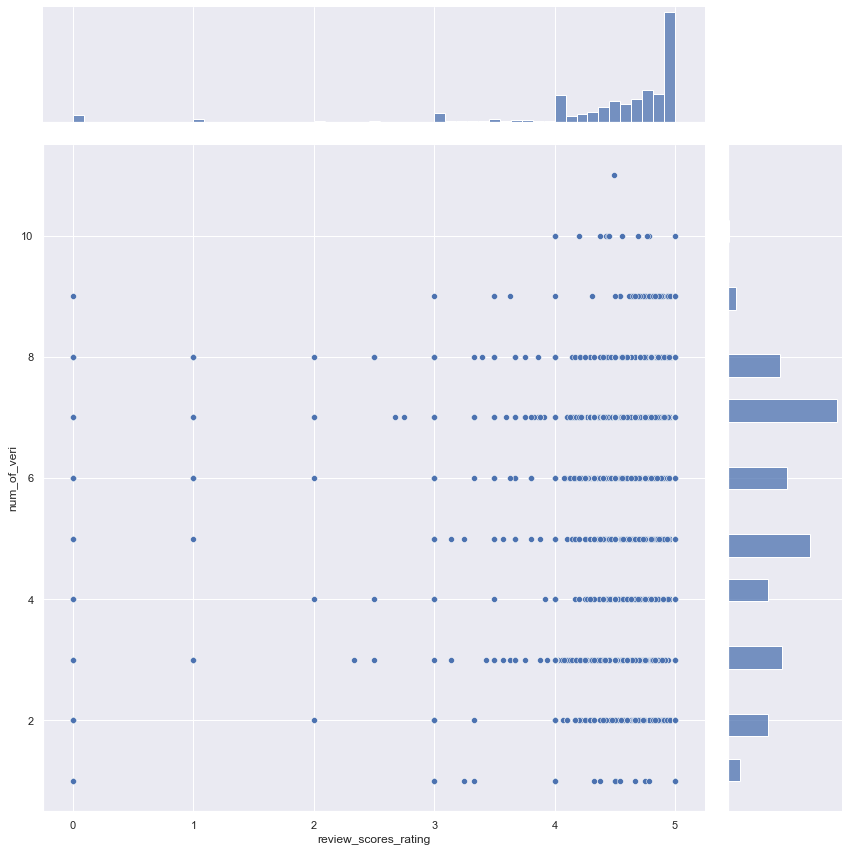

In [50]:
f = plt.figure(figsize=(24, 4))
sb.jointplot(data = air_data, x = "review_scores_rating", y = "num_of_veri", height = 12)

<AxesSubplot:>

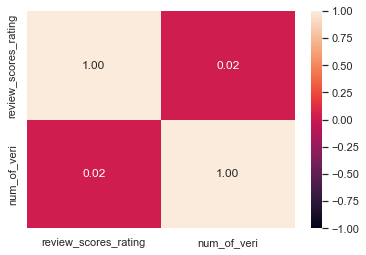

In [51]:
num_veri = pd.DataFrame(air_data["num_of_veri"])
jointDF = pd.concat([ratings, num_veri], axis = 1).reindex(ratings.index)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [52]:
air_data["has_fb_veri"] = np.where(air_data["host_verifications"].str.contains("facebook",case=False,regex=False)==True, True, False)


<Figure size 1728x720 with 0 Axes>

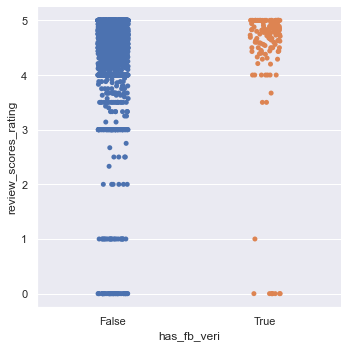

In [53]:
f = plt.figure(figsize=(24, 10))
sb.catplot(y = "review_scores_rating", x = "has_fb_veri",data=air_data)